<a href="https://colab.research.google.com/github/Jamess200/BirdnetProject/blob/main/Main_AI_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Mount Google Drive
# Mount Google Drive to access files stored in it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Change Directory
# Change the working directory to a specific path in your Google Drive
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
#@title Set Up Repository Path & Clone Repository
import os
# Define path in Google Drive where you want to clone the repository
repo_path = '/content/drive/MyDrive/'

# Check if directory already exists, create it if not
if not os.path.exists(repo_path):
    os.makedirs(repo_path)

# Change working directory to defined path
os.chdir(repo_path)

# Clone the repository if doesnt exist, otherwise pull latest changes
if not os.path.exists(os.path.join(repo_path, 'BirdnetProject')):
    !git clone https://github.com/Jamess200/BirdnetProject
else:
    os.chdir('BirdnetProject')
    !git pull

# Verify cloned repository
!ls

Already up to date.
Files  README.md


In [5]:
#@title Install Required Python Packages
# Install required packages
!pip3 install birdnetlib
!pip3 install tflite-runtime
!pip3 install resampy
!pip3 install ffmpeg
!pip install pygbif
!pip install mplcursors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=4695dab3a69f63977fc7f3c9ce81db68d18eb31991eca9d2f3f7b4b4e2c250bb
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting req

In [9]:
#@title Import Necessary Libraries
# Import necessary libraries
import resampy
import birdnetlib
import tflite_runtime
import ffmpeg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
from sklearn.metrics import confusion_matrix, classification_report
from birdnetlib import Recording
from birdnetlib.analyzer import Analyzer
from datetime import datetime
from pygbif import occurrences, species

In [ ]:
#@title Set Up Directory and File Paths
# Define the directory where the data is stored
dataDir = '/content/drive/MyDrive/XC'

# List all files in the directory
file_names = os.listdir(dataDir)

# Print the file names to verify the data files
print(file_names)

['.ipynb_checkpoints', 'XC3_20210404_054400.wav']


In [ ]:
#@title Initialise BirdNET Analyzer
# Initialise the BirdNET-Analyzer model
analyzer = Analyzer()
# Define the coordinates and date for the recordings
testamp = [	51.7813,	-2.5745]

Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.


In [ ]:
#@title Analyse Audio Files and Store Results
# Create a dictionary to store the results
results = {}

# Date of recording
recording_date = datetime(year=2020, month=5, day=30)

for file_name in file_names:
    try:
        file_path = os.path.join(dataDir, file_name)

        if os.path.isdir(file_path):
            continue

        if not file_name.lower().endswith(('.wav', '.mp3', '.flac')):
            print(f"Skipping non-audio file: {file_name}")
            continue

        recording = Recording(
            analyzer,
            file_path,  # path to the recording file
            lat=testamp[0],  # latitude of the recording location
            lon=testamp[1],  # longitude of the recording location
            date=recording_date,  # the date of the recording
            min_conf=0.1,
        )
        recording.analyze()
        results[file_name] = recording.detections
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

read_audio_data
read_audio_data: complete, read  1464 chunks.
analyze_recording XC3_20210404_054400.wav
recording has lon/lat
set_predicted_species_list_from_position
return_predicted_species_list
20
128 species loaded.


In [ ]:
#@title Convert Results to DataFrame and Save as CSV
# Flatten the results dictionary
flattened_data = []
for filename, records in results.items():
    for record in records:
        record['filename'] = filename
        flattened_data.append(record)

# Convert the flattened data to a DataFrame
df = pd.DataFrame(flattened_data)

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC3_1_20210404_054400.csv'
df.to_csv(csv_file_path, index=False)

# Confirm that the results have been saved successfully
print(f"Results have been successfully converted to CSV and saved to {csv_file_path}")

Results have been successfully converted to CSV and saved to /content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC3_1_20210404_054400.csv


In [ ]:
#@title Load and Verify CSV Data
# Load the saved CSV file into a DataFrame to verify the contents
csv_file_path = '/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC3_1_20210404_054400.csv'
df = pd.read_csv(csv_file_path)

# Print the DataFrame to verify the data
print(df.head)

<bound method NDFrame.head of                   common_name     scientific_name  start_time  end_time  \
0              European Robin  Erithacus rubecula       195.0     198.0   
1                   Goldcrest     Regulus regulus       273.0     276.0   
2        Eurasian Treecreeper  Certhia familiaris       447.0     450.0   
3          Common Wood-Pigeon    Columba palumbus       555.0     558.0   
4          Common Wood-Pigeon    Columba palumbus       570.0     573.0   
..                        ...                 ...         ...       ...   
553        Common Wood-Pigeon    Columba palumbus      4350.0    4353.0   
554        Common Wood-Pigeon    Columba palumbus      4353.0    4356.0   
555        Common Wood-Pigeon    Columba palumbus      4359.0    4362.0   
556        Common Wood-Pigeon    Columba palumbus      4362.0    4365.0   
557  Great Spotted Woodpecker   Dendrocopos major      4383.0    4386.0   

     confidence                                       label  \
0     

In [ ]:
#@title Change Working Directory
# Change working directory to defined path
os.chdir('/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC')

# Verify working directory
print(os.getcwd())

/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC


In [ ]:
#@title Create Merged Dataframe File For All Transects

# Read in the CSV files
df_XC1 = pd.read_csv('XC1_25_20230615_180000.csv')
df_XC2 = pd.read_csv('XC2_25_20200530_171400.csv')
df_XC3 = pd.read_csv('XC3_25_20210404_054400.csv')

# Add a column to each dataframe to indicate the transect source
df_XC1['transect'] = 1
df_XC2['transect'] = 2
df_XC3['transect'] = 3

# Function to extract date and hour from the filename
def extract_datetime(filename):
    date_str = filename.split('_')[1]
    time_str = filename.split('_')[2].split('.')[0]
    datetime_str = date_str + ' ' + time_str
    datetime = pd.to_datetime(datetime_str, format='%Y%m%d %H%M%S')
    return datetime

# Apply the function to create a new datetime column
df_XC1['datetime'] = df_XC1['filename'].apply(extract_datetime)
df_XC2['datetime'] = df_XC2['filename'].apply(extract_datetime)
df_XC3['datetime'] = df_XC3['filename'].apply(extract_datetime)

# Function to convert seconds to hour:minutes:seconds format based on the datetime
def seconds_to_hms(datetime, seconds):
    new_time = datetime + pd.to_timedelta(seconds, unit='s')
    return new_time.strftime('%-H:%M:%S')

# Apply the function to convert start_time and end_time
df_XC1['start_time'] = df_XC1.apply(lambda row: seconds_to_hms(row['datetime'], row['start_time']), axis=1)
df_XC1['end_time'] = df_XC1.apply(lambda row: seconds_to_hms(row['datetime'], row['end_time']), axis=1)
df_XC2['start_time'] = df_XC2.apply(lambda row: seconds_to_hms(row['datetime'], row['start_time']), axis=1)
df_XC2['end_time'] = df_XC2.apply(lambda row: seconds_to_hms(row['datetime'], row['end_time']), axis=1)
df_XC3['start_time'] = df_XC3.apply(lambda row: seconds_to_hms(row['datetime'], row['start_time']), axis=1)
df_XC3['end_time'] = df_XC3.apply(lambda row: seconds_to_hms(row['datetime'], row['end_time']), axis=1)

# Concatenate the dataframes
concatenated_df = pd.concat([df_XC1, df_XC2], ignore_index=True)

# Extract date and start hour
concatenated_df['date'] = concatenated_df['datetime'].dt.date
concatenated_df['start_hour'] = concatenated_df['datetime'].dt.hour

# Sort the dataframe by transect, date, start_time, common_name, and confidence
concatenated_df = concatenated_df.sort_values(by=['transect', 'date', 'start_time', 'common_name', 'confidence'])

# Reorder the columns to have transect, date, start_hour, time, and readable start/end times
reordered_columns = ['transect', 'date', 'start_hour', 'start_time', 'end_time', 'common_name', 'scientific_name', 'confidence', 'label', 'filename']
concatenated_df = concatenated_df[reordered_columns]

# Display the first few rows of the concatenated dataframe
print("\nNew Dataframe:")
print(concatenated_df.head())
print(concatenated_df.tail())



New Dataframe:
   transect        date  start_hour start_time  end_time         common_name  \
0         1  2023-06-15          18   18:00:03  18:00:06   Eurasian Blackcap   
1         1  2023-06-15          18   18:00:06  18:00:09   Eurasian Blackcap   
2         1  2023-06-15          18   18:00:12  18:00:15   Eurasian Blackcap   
3         1  2023-06-15          18   18:00:18  18:00:21  Eurasian Blackbird   
4         1  2023-06-15          18   18:00:21  18:00:24   Eurasian Blackcap   

      scientific_name  confidence                                 label  \
0  Sylvia atricapilla    0.490236  Sylvia atricapilla_Eurasian Blackcap   
1  Sylvia atricapilla    0.586808  Sylvia atricapilla_Eurasian Blackcap   
2  Sylvia atricapilla    0.568825  Sylvia atricapilla_Eurasian Blackcap   
3       Turdus merula    0.417446      Turdus merula_Eurasian Blackbird   
4  Sylvia atricapilla    0.774901  Sylvia atricapilla_Eurasian Blackcap   

                  filename  
0  XC1_20230615_180000.

In [ ]:
#@title Save data as a CSV File
# Save the concatenated dataframe to a CSV file
output_filename = 'XC_25_Merged.csv'
concatenated_df.to_csv(output_filename, index=False)
print(f"The combined dataframe has been saved to {output_filename}")

The combined dataframe has been saved to XC_25_Merged.csv


In [ ]:
#@title Save Data as a Excel File
# Save the dataframe to an Excel file
output_file = 'XC_25_Merged.xlsx'
concatenated_df.to_excel(output_file, index=False)
print(f"\nDataframe has been saved to {output_file}")


Dataframe has been saved to XC_25_Merged.xlsx


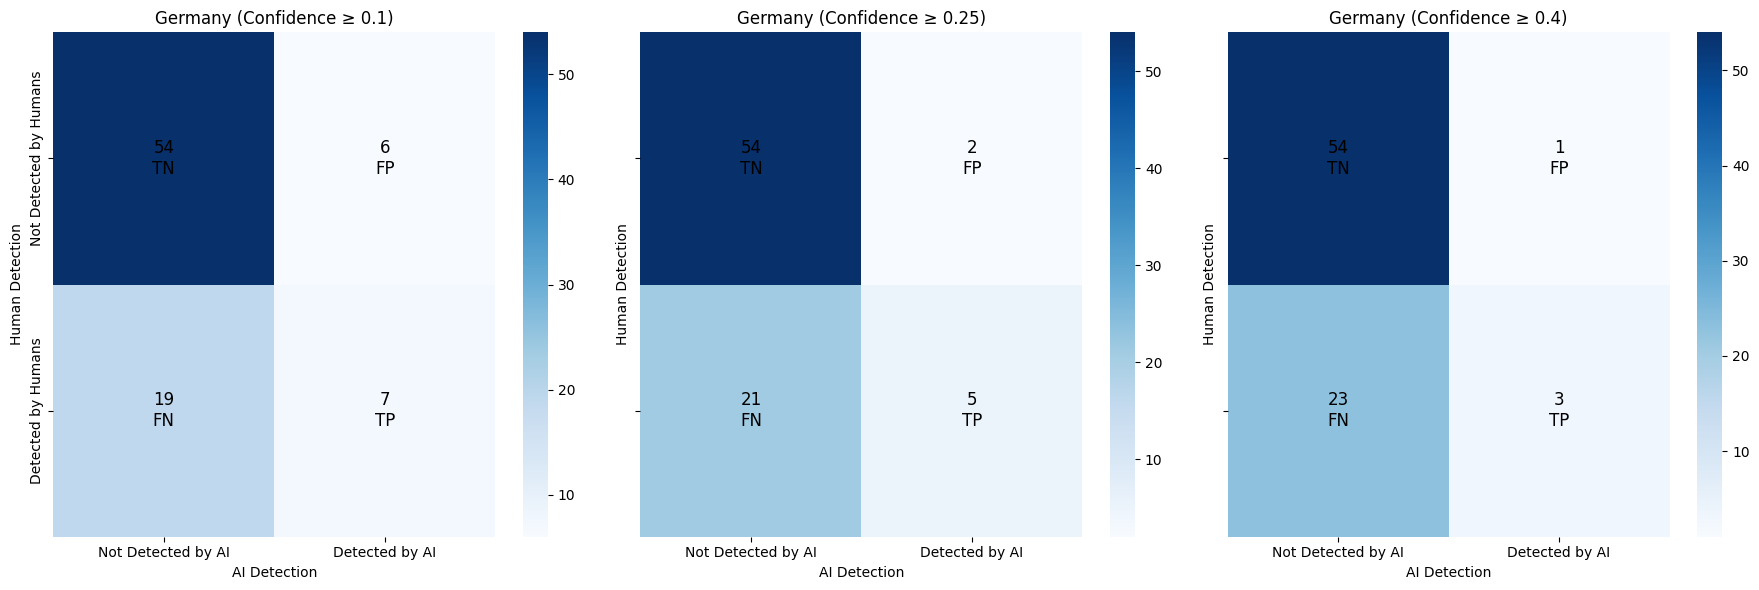

In [17]:
#@title Species Detection Analysis: Comparing Human and AI Observations with GBIF Data in Germany

# Define parameters for GBIF data retrieval for Germany
params_Ger = {
    'country_code': 'DE',  # Germany
    'start_date': '2020-03-01',  # Start date for observation
    'end_date': '2021-07-01'     # End date for observation
}

# Taxon key for Aves (birds)
taxon_key = 212

# Fetching species data from GBIF for Germany
gbif_data_Ger = occurrences.search(
    taxonKey=taxon_key,
    country=params_Ger['country_code'],
    from_date=params_Ger['start_date'],
    to_date=params_Ger['end_date'],
    limit=300
)

species_names_Ger = [record['species'] for record in gbif_data_Ger['results'] if 'species' in record]
unique_species_Ger = set(species_names_Ger)

# Human detected species (true labels from Xeno-Canto) with scientific names
human_detections_scientific_Ger = {
    "Regulus ignicapilla", "Turdus viscivorus", "Columba palumbus", "Fringilla coelebs",
    "Cuculus canorus", "Coccothraustes coccothraustes", "Turdus philomelos", "Sylvia atricapilla",
    "Turdus merula", "Sitta europaea", "Dendrocoptes medius", "Corvus corone",
    "Parus major", "Erithacus rubecula", "Aegithalos caudatus", "Accipiter gentilis",
    "Certhia brachydactyla", "Dendrocopos major", "Garrulus glandarius", "Phylloscopus collybita",
    "Chloris chloris", "Periparus ater", "Certhia familiaris", "Poecile palustris",
    "Scolopax rusticola", "Sturnus vulgaris"
}

# File paths and titles for visualization
files_Ger = [
    ('/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC2_1_20200530_171400.csv', "Confidence ≥ 0.1"),
    ('/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC2_25_20200530_171400.csv', "Confidence ≥ 0.25"),
    ('/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC2_40_20200530_171400.csv', "Confidence ≥ 0.4")
]

# Function to load BirdNET predictions
def load_birdnet_predictions(file_paths):
    species = []
    for path in file_paths:
        df = pd.read_csv(path)
        species.extend(df['scientific_name'].tolist())
    return set(species)  # Remove duplicates and convert to set

# Set up the figure for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.4)

# Function to visualize confusion matrix
def plot_confusion_matrix(cm, title, ax):
    labels = ['TN', 'FP', 'FN', 'TP']
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=['Not Detected by AI', 'Detected by AI'], yticklabels=['Not Detected by Humans', 'Detected by Humans'], ax=ax)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            label = labels[i * 2 + j]
            ax.text(j + 0.5, i + 0.5, f'{cm[i, j]}\n{label}', ha='center', va='center', fontsize=12, color='black')
    ax.set_xlabel('AI Detection')
    ax.set_ylabel('Human Detection')
    ax.set_title(title)

# Generate Confusion Matrix data for Germany
for idx, (file_path, title) in enumerate(files_Ger):
    # Load BirdNET data
    predicted_scientific_names_Ger = load_birdnet_predictions([file_path])

    # Combine human and predicted species lists
    all_species_Ger = list(human_detections_scientific_Ger.union(predicted_scientific_names_Ger))

    # Create presence/absence vectors
    human_vector_Ger = [1 if species in human_detections_scientific_Ger else 0 for species in all_species_Ger]
    predicted_vector_Ger = [1 if species in predicted_scientific_names_Ger else 0 for species in all_species_Ger]

    # Generate Confusion Matrix
    conf_matrix_Ger = confusion_matrix(human_vector_Ger, predicted_vector_Ger)

    # Update True Negatives (TN) using GBIF data
    detected_species_Ger = human_detections_scientific_Ger.union(predicted_scientific_names_Ger)
    true_negatives_count_Ger = len(unique_species_Ger - detected_species_Ger)
    conf_matrix_Ger[0, 0] = true_negatives_count_Ger

    # Plot Confusion Matrix
    plot_confusion_matrix(conf_matrix_Ger, title=f'Germany ({title})', ax=axes[idx])

# Ensure y-axis labels are consistent
for ax in axes:
    ax.set_ylabel('Human Detection')
    ax.set_xlabel('AI Detection')

plt.tight_layout()

# Add interactivity with mplcursors
mplcursors.cursor(hover=True)

plt.show()

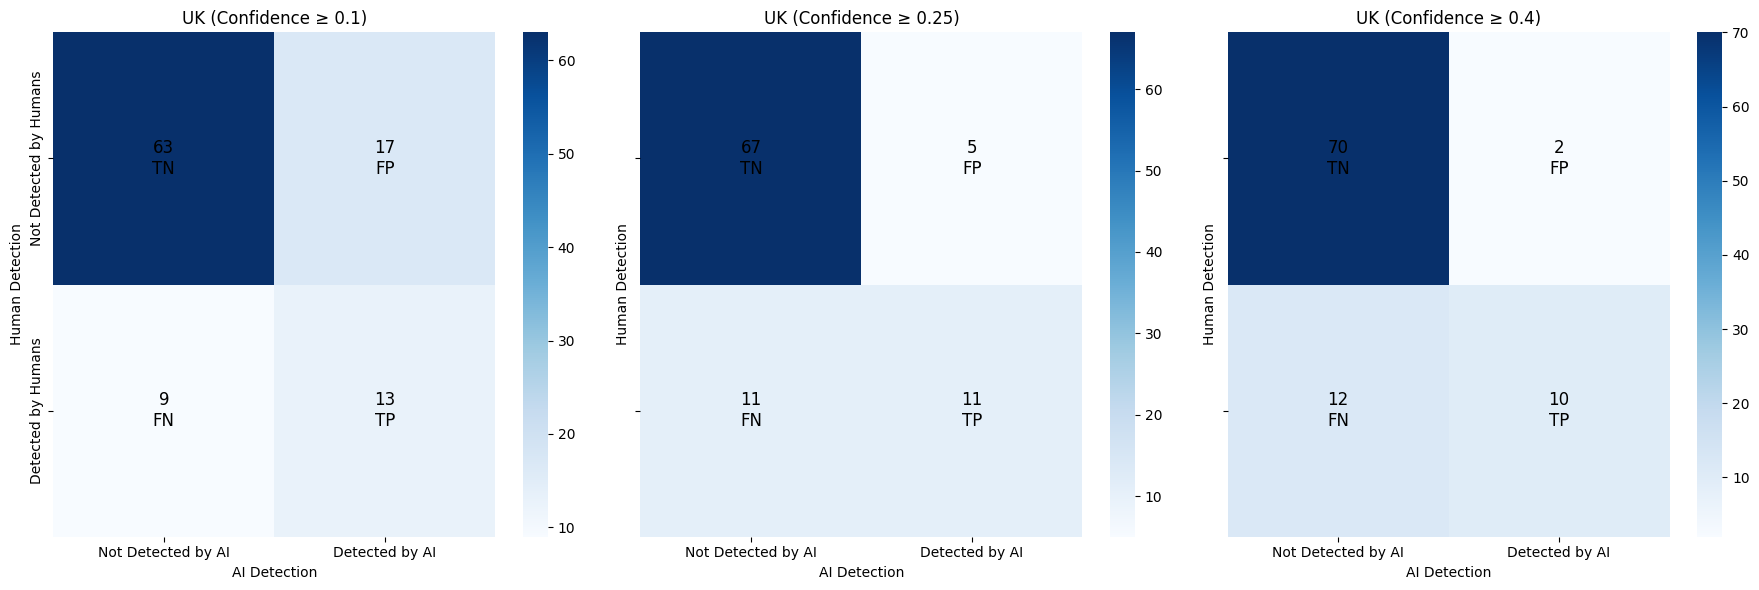

In [18]:
#@title Species Detection Analysis: Comparing Human and AI Observations with GBIF Data in UK

# Define parameters for GBIF data retrieval for the UK
params_UK = {
    'country_code': 'GB',  # United Kingdom
    'start_date': '2021-02-01',  # Start date for observation
    'end_date': '2022-16-01'     # End date for observation
}

# Taxon key for Aves (birds)
taxon_key = 212

# Fetching species data from GBIF for the UK
gbif_data_UK = occurrences.search(
    taxonKey=taxon_key,
    country=params_UK['country_code'],
    from_date=params_UK['start_date'],
    to_date=params_UK['end_date'],
    limit=300
)

species_names_UK = [record['species'] for record in gbif_data_UK['results'] if 'species' in record]
unique_species_UK = set(species_names_UK)

# Human detected species (true labels from Xeno-Canto) with scientific names
human_detections_scientific_UK = {
    "Cyanistes caeruleus", "Regulus regulus", "Anser anser", "Columba palumbus",
    "Turdus philomelos", "Turdus merula", "Sitta europaea", "Branta canadensis",
    "Corvus corone", "Sitta europaea", "Dendrocoptes medius", "Corvus corone",
    "Parus major", "Parus major", "Aix galericulata", "Coloeus monedula",
    "Erithacus rubecula", "Strix aluco", "Columba oenas", "Dendrocopos major",
    "Troglodytes troglodytes", "Periparus ater", "Certhia familiaris", "Phasianus colchicus",
    "Anas platyrhynchos"
}

# File paths and titles for visualization
files_UK = [
    ('/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC3_1_20210404_054400.csv', "Confidence ≥ 0.1"),
    ('/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC3_25_20210404_054400.csv', "Confidence ≥ 0.25"),
    ('/content/drive/MyDrive/BirdnetProject/Files/data/CSV_data/XC/XC3_40_20210404_054400.csv', "Confidence ≥ 0.4")
]

# Function to load BirdNET predictions
def load_birdnet_predictions(file_paths):
    species = []
    for path in file_paths:
        df = pd.read_csv(path)
        species.extend(df['scientific_name'].tolist())
    return set(species)  # Remove duplicates and convert to set

# Set up the figure for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.4)

# Function to visualize confusion matrix
def plot_confusion_matrix(cm, title, ax):
    labels = ['TN', 'FP', 'FN', 'TP']
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=['Not Detected by AI', 'Detected by AI'], yticklabels=['Not Detected by Humans', 'Detected by Humans'], ax=ax)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            label = labels[i * 2 + j]
            ax.text(j + 0.5, i + 0.5, f'{cm[i, j]}\n{label}', ha='center', va='center', fontsize=12, color='black')
    ax.set_xlabel('AI Detection')
    ax.set_ylabel('Human Detection')
    ax.set_title(title)

# Generate Confusion Matrix data for UK
for idx, (file_path, title) in enumerate(files_UK):
    # Load BirdNET data
    predicted_scientific_names_UK = load_birdnet_predictions([file_path])

    # Combine human and predicted species lists
    all_species_UK = list(human_detections_scientific_UK.union(predicted_scientific_names_UK))

    # Create presence/absence vectors
    human_vector_UK = [1 if species in human_detections_scientific_UK else 0 for species in all_species_UK]
    predicted_vector_UK = [1 if species in predicted_scientific_names_UK else 0 for species in all_species_UK]

    # Generate Confusion Matrix
    conf_matrix_UK = confusion_matrix(human_vector_UK, predicted_vector_UK)

    # Update True Negatives (TN) using GBIF data
    detected_species_UK = human_detections_scientific_UK.union(predicted_scientific_names_UK)
    true_negatives_count_UK = len(unique_species_UK - detected_species_UK)
    conf_matrix_UK[0, 0] = true_negatives_count_UK

    # Plot Confusion Matrix
    plot_confusion_matrix(conf_matrix_UK, title=f'UK ({title})', ax=axes[idx])

# Ensure y-axis labels are consistent
for ax in axes:
    ax.set_ylabel('Human Detection')
    ax.set_xlabel('AI Detection')

plt.tight_layout()

# Add interactivity with mplcursors
mplcursors.cursor(hover=True)

plt.show()